# Deep Weight Initialization Issue;
This jupyter/ipython notebook is designed to show the affect of improperly initialized data. Start with just using the idea of Gaussian initialization (and build from there). The depth of the network is 10 layers with 500 features per-layer. Start by construct the batch that will be input (D).

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#Gaussian 10-D input
D = np.random.randn(1000,500)
hidden_layer_sizes = [500] * 10

act = { 'relu' : lambda x : np.maximum(x,0),
        'tanh' : lambda x : np.tanh(x) }

non_linearities = ['tanh'] * len(hidden_layer_sizes)

## $$\tanh(x)$$
Starting with the `tanh(x)` activation.
1. `Hs` will be used to store the output after each affine connection and activation;
2. `X` in side the loop is a variable used to store the layers input
3. `W` will be randomly initialized (in order to show behaviour)

In [2]:
Hs  = {} # diction to be used for storing the output of each activation layer;
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx]
    W = np.random.randn(fan_in, fan_out) * 0.01
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

## Statistics of the output of each layer

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 5.46917e-05 and std 0.213162
Hidden layer 1 had mean 1.34368e-05 and std 0.0475451
Hidden layer 2 had mean -7.29965e-06 and std 0.0106061
Hidden layer 3 had mean -2.1506e-06 and std 0.00238113
Hidden layer 4 had mean 6.17845e-07 and std 0.000533711
Hidden layer 5 had mean -1.08459e-07 and std 0.000119522
Hidden layer 6 had mean -4.51007e-08 and std 2.6982e-05
Hidden layer 7 had mean -8.45293e-09 and std 6.00955e-06
Hidden layer 8 had mean 2.54597e-09 and std 1.34362e-06
Hidden layer 9 had mean 4.69705e-11 and std 2.98486e-07


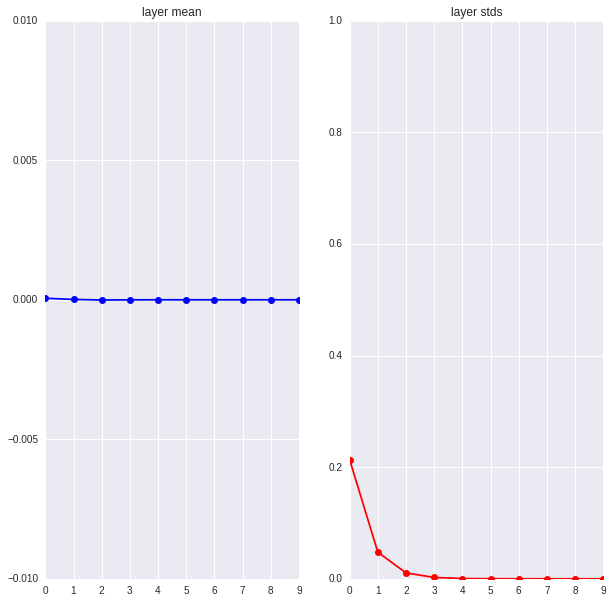

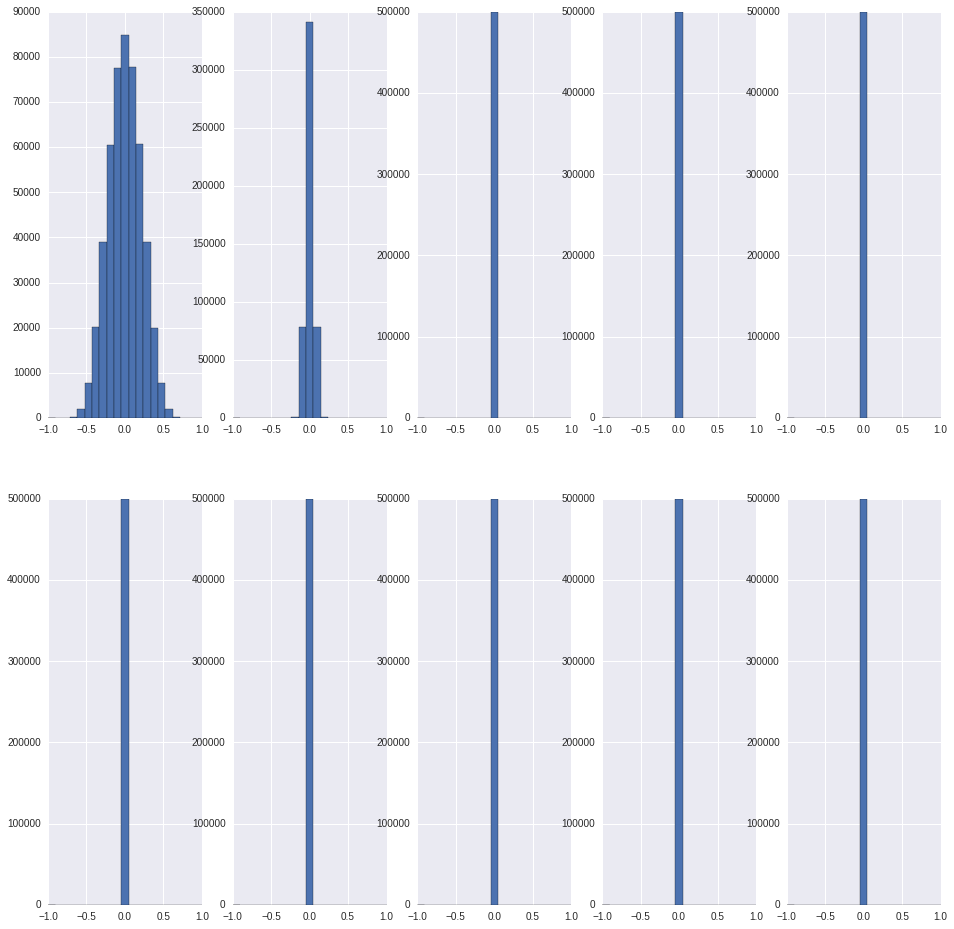

In [3]:
print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-0.01,0.01])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    plt.hist(H.ravel(), 21, range=(-1,1))


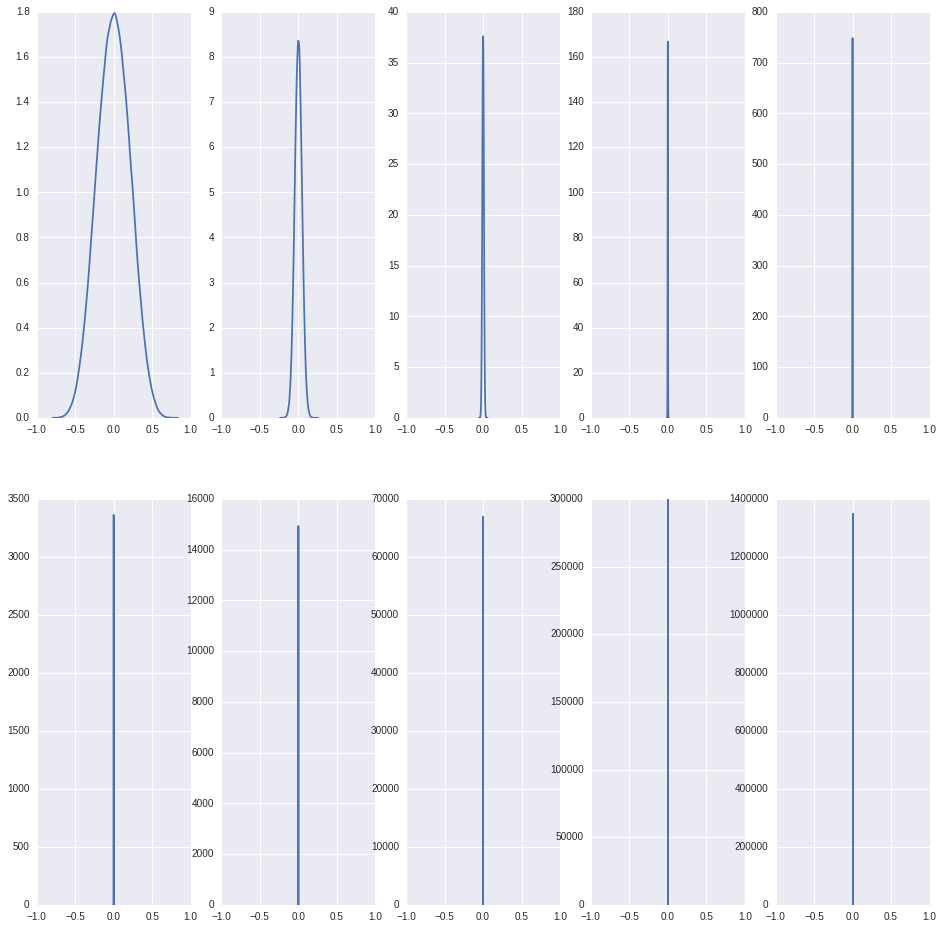

In [4]:
#kde plots
X_layers = []
y_std    = []
y_mean   = []

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    #grab some statistics
    X_layers.append(i)
    y_std.append(np.std(H))
    y_mean.append(np.mean(H))
    #
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])

# plt.figure(figsize=(16,16))
# plt.plot(X_layers,y_std)
# plt.show()


## Do we have a **Problem?**
After the second hidden layer 2, we can see that the variance (or standard deviation) of the output from the proceeding affine transformation and activation is very small (this was already found above, but the actually KDE distribution or histograms gives a slightly better visualization of the results). In otherwords - almost all the activations are **0** (or would be consistent with the bias vector if it was being used) - and this is a problem. What does this mean for the gradients? Lets start with an input of all ones. So the following (using backpropagation rules) and neglecting the activation derivative (in all cases for `tanh(x)` and `relu(x)` the derivative is always going to be strictly less than or equal to **1**):
```
W_grad = np.dot(X.T,dout)
dx     = np.dot(dout, W.T)
```
if `dout` is the gradient that is being passed back into as the input for the back propagation algorithm and it comes from the layer above, the outputs from the backpropagation are the gradient of W (and dx, and currently we are neglecting bias) for every layer. So proceeding backwards from the final layer with simplified loss model (is done below);

W_grad layer 9 had mean 2.54597e-06 and std 3.70531e-05
W_grad layer 8 had mean -1.51005e-07 and std 3.49689e-05
W_grad layer 7 had mean 2.80452e-08 and std 3.79768e-05
W_grad layer 6 had mean 1.87408e-08 and std 3.74047e-05
W_grad layer 5 had mean -1.85948e-07 and std 3.71076e-05
W_grad layer 4 had mean 1.22708e-08 and std 3.77574e-05
W_grad layer 3 had mean -2.49759e-08 and std 3.81012e-05
W_grad layer 2 had mean -4.3854e-09 and std 3.74948e-05
W_grad layer 1 had mean 1.60574e-09 and std 3.98716e-05
W_grad layer 0 had mean 6.34473e-08 and std 4.18285e-05
dx layer 9 had mean 0.0178643 and std 0.216921
dx layer 8 had mean -0.000621835 and std 0.0478638
dx layer 7 had mean -0.000172792 and std 0.0105073
dx layer 6 had mean -0.000300963 and std 0.0024073
dx layer 5 had mean -5.70574e-06 and std 0.000534982
dx layer 4 had mean 3.42143e-06 and std 0.000121002
dx layer 3 had mean -3.27054e-07 and std 2.63902e-05
dx layer 2 had mean 3.16048e-08 and std 6.13872e-06
dx layer 1 had mean -4.8624

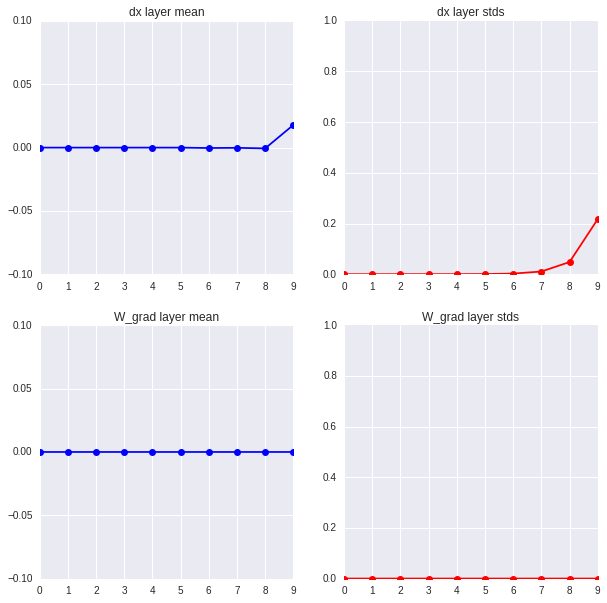

In [5]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
    #     W_grad[i] = np.dot(Hs[i].T, dout)
    #     dout = np.dot(dout, Ws[i].T)
    #     Dx[i] = dout
    # ABOVE is without activation modification
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
ax = plt.subplot(221)
ax.set_ylim([-0.1,0.1])
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
ax = plt.subplot(222)
ax.set_ylim([-0.001,1.])
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
ax = plt.subplot(223)
ax.set_ylim([-0.1,0.1])
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
ax = plt.subplot(224)
ax.set_ylim([-0.001,1.])
plt.title('W_grad layer stds')

# Gradient Alteration

Suppose that the gradient of the loss was actually initialized randomly (instead). Does this imporve the situation?

W_grad layer 9 had mean 5.35663e-09 and std 2.44558e-05
W_grad layer 8 had mean 1.48691e-08 and std 2.44064e-05
W_grad layer 7 had mean 1.98182e-08 and std 2.46153e-05
W_grad layer 6 had mean 5.95958e-08 and std 2.40602e-05
W_grad layer 5 had mean 1.87562e-08 and std 2.40477e-05
W_grad layer 4 had mean -6.1762e-08 and std 2.38523e-05
W_grad layer 3 had mean 4.49894e-08 and std 2.38595e-05
W_grad layer 2 had mean 7.91386e-08 and std 2.414e-05
W_grad layer 1 had mean -2.91731e-08 and std 2.42755e-05
W_grad layer 0 had mean -4.89865e-09 and std 2.46391e-05
dx layer 9 had mean -0.000153981 and std 0.129084
dx layer 8 had mean -3.4095e-05 and std 0.028845
dx layer 7 had mean 9.06725e-06 and std 0.00643915
dx layer 6 had mean 3.19444e-07 and std 0.00144298
dx layer 5 had mean -2.33014e-07 and std 0.000320462
dx layer 4 had mean 1.45276e-07 and std 7.16472e-05
dx layer 3 had mean -2.1978e-08 and std 1.61684e-05
dx layer 2 had mean -5.77554e-09 and std 3.61758e-06
dx layer 1 had mean -5.17836e

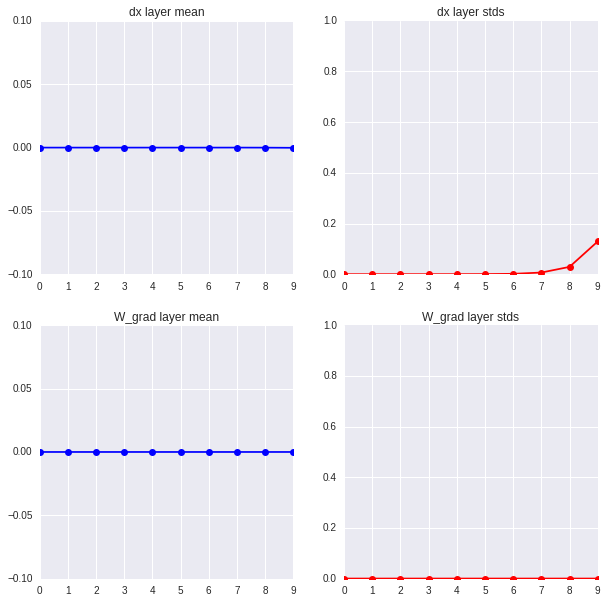

In [6]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1.,size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
# ABOVE is without activation modification
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
ax = plt.subplot(221)
ax.set_ylim([-0.1,0.1])
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
ax = plt.subplot(222)
ax.set_ylim([-0.001,1.])
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
ax = plt.subplot(223)
ax.set_ylim([-0.1,0.1])
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
ax = plt.subplot(224)
ax.set_ylim([-0.001,1.])
plt.title('W_grad layer stds')

## What does this mean for training?
From above, see that the gradients are almost all zero. This is **BAD** (stocastic gradient descent relies upon having a non-negligible gradient in order to shift the weights). Further, the gradient of the layer inputs gets smaller and smaller with each step backwards into the network.

## What about using a larger weight parameter?
The weight parameter of `0.01` seemed arbitrary (**it was**). What happens is we changes this the initialization parameter to something much larger. Lets try using: `1.` - looking at the plots, almost all the neurons are staturated. Staturation region is not ideal in the case of a `tanh(x)` activation (because the gradients are implicitly small when in the staturation region, in addition small shifts in the first layers may correspond to very large shifts in the last layer).

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.000447677 and std 0.982018
Hidden layer 1 had mean -0.000183981 and std 0.981637
Hidden layer 2 had mean 0.00234989 and std 0.981816
Hidden layer 3 had mean -0.00137037 and std 0.981537
Hidden layer 4 had mean -0.00354404 and std 0.981782
Hidden layer 5 had mean 0.0012261 and std 0.981705
Hidden layer 6 had mean -0.000507208 and std 0.981788
Hidden layer 7 had mean -0.00125231 and std 0.981867
Hidden layer 8 had mean -0.00234869 and std 0.981426
Hidden layer 9 had mean -0.00219003 and std 0.981423


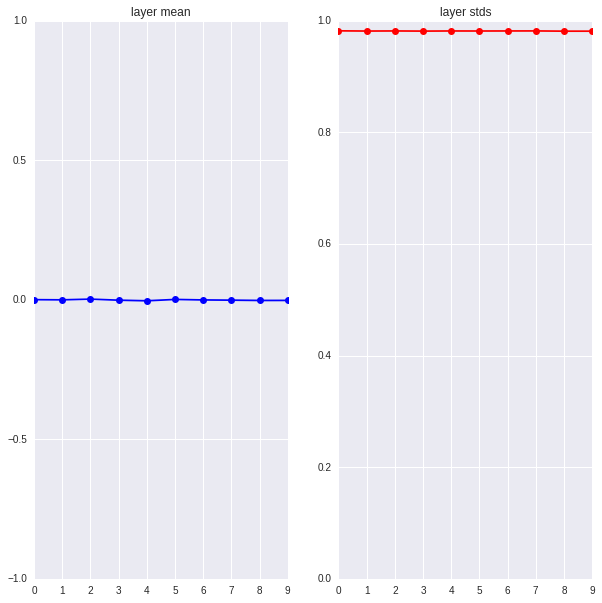

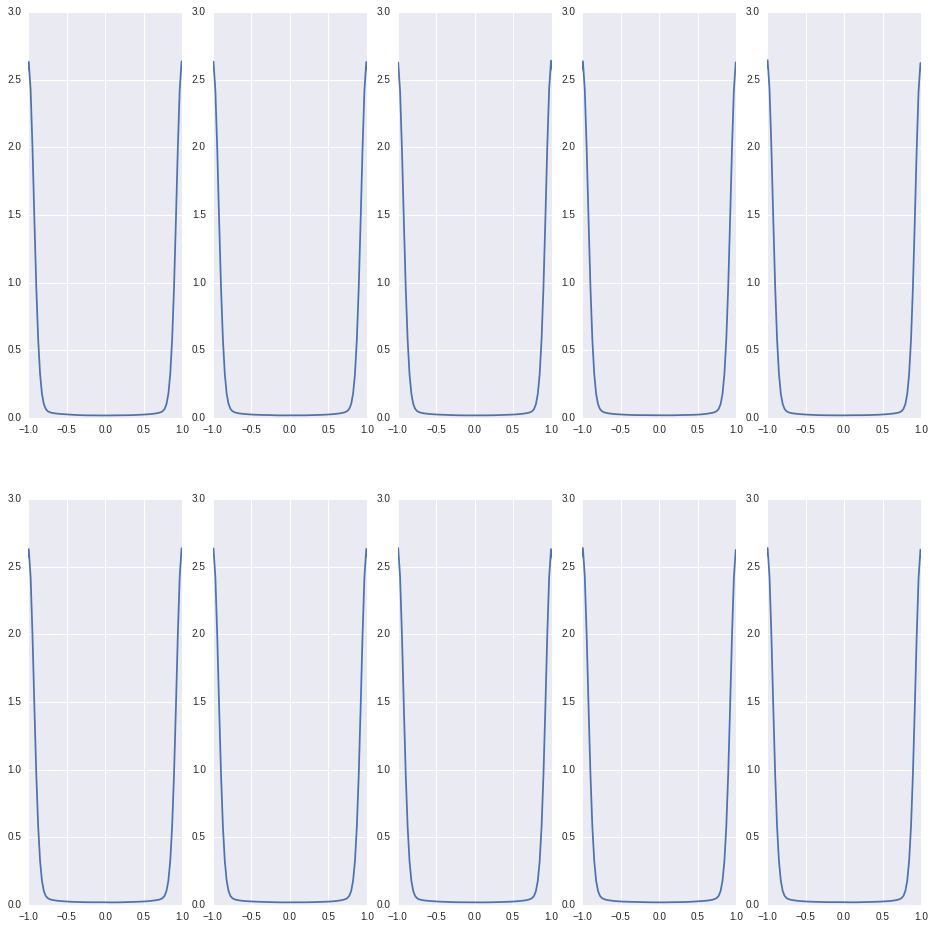

In [7]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 1.0
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean -0.00309438 and std 7.94943
W_grad layer 8 had mean -0.118332 and std 78.9934
W_grad layer 7 had mean 3.37909 and std 779.793
W_grad layer 6 had mean 8.50369 and std 7797.65
W_grad layer 5 had mean 20.5326 and std 77910.8
W_grad layer 4 had mean -518.055 and std 772609
W_grad layer 3 had mean -4359.48 and std 7.63254e+06
W_grad layer 2 had mean -5817 and std 7.60107e+07
W_grad layer 1 had mean -770562 and std 7.53352e+08
W_grad layer 0 had mean 1.6923e+07 and std 7.61946e+09
dx layer 9 had mean -0.0108458 and std 5.71956
dx layer 8 had mean 0.0785967 and std 56.6641
dx layer 7 had mean 0.61574 and std 564.727
dx layer 6 had mean 19.2429 and std 5619.25
dx layer 5 had mean -69.7076 and std 55905.3
dx layer 4 had mean -101.241 and std 553811
dx layer 3 had mean 1374.19 and std 5.50755e+06
dx layer 2 had mean 29400.6 and std 5.46049e+07
dx layer 1 had mean -188770 and std 5.42516e+08
dx layer 0 had mean -6.12923e+06 and std 5.36634e+09


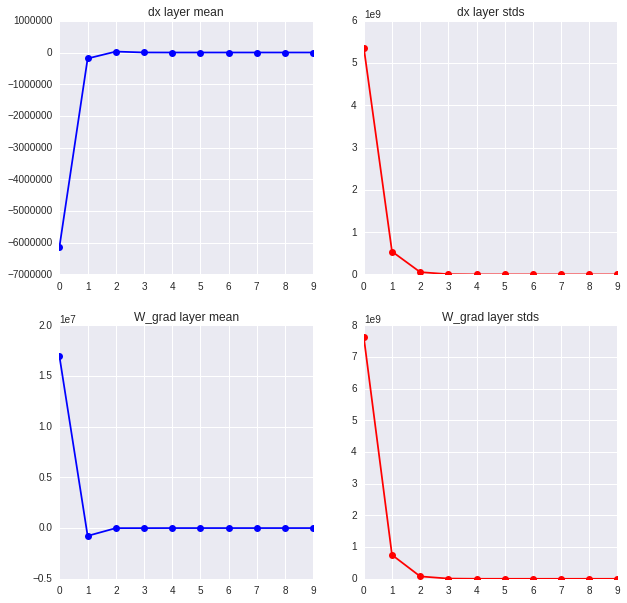

In [8]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1.,size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Instability
From the above plots, we can see that there is a large chance for instability in the lower layers. From this, it would require a very small learning weight in order to guaranteee that the lower layers have **small** weight shifts. What if we change the gradient of the loss (i.e. having a full activated gradient)? Doesn't help.

W_grad layer 9 had mean -1.02966 and std 13.4139
W_grad layer 8 had mean 0.387938 and std 139.133
W_grad layer 7 had mean 0.382114 and std 1559.38
W_grad layer 6 had mean -13.6701 and std 14741.4
W_grad layer 5 had mean -367.764 and std 129982
W_grad layer 4 had mean 1053.75 and std 1.2392e+06
W_grad layer 3 had mean -25277.8 and std 1.19855e+07
W_grad layer 2 had mean -49129.6 and std 1.17806e+08
W_grad layer 1 had mean -1.00421e+06 and std 1.26466e+09
W_grad layer 0 had mean -1.24013e+07 and std 1.32511e+10
dx layer 9 had mean -0.793664 and std 10.0721
dx layer 8 had mean 5.28902 and std 103.442
dx layer 7 had mean -52.1083 and std 981.066
dx layer 6 had mean 270.972 and std 9040.93
dx layer 5 had mean -1066.92 and std 88798.3
dx layer 4 had mean -19861.5 and std 879620
dx layer 3 had mean -139567 and std 9.00064e+06
dx layer 2 had mean -3.82983e+06 and std 9.30625e+07
dx layer 1 had mean -4.21135e+06 and std 9.56412e+08
dx layer 0 had mean 6.96824e+08 and std 9.39505e+09


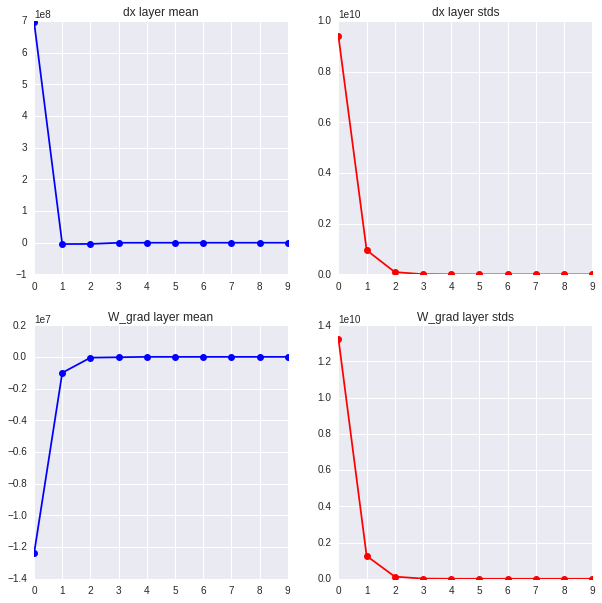

In [9]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## What about using a different weight parameter?
What happens is we changes this the initialization parameter to something much larger than 0.01 and less than 1.0. Lets try using: 0.1.

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.0024247 and std 0.817635
Hidden layer 1 had mean 0.00260619 and std 0.779126
Hidden layer 2 had mean 0.0017274 and std 0.768947
Hidden layer 3 had mean 0.00109993 and std 0.766651
Hidden layer 4 had mean 0.00110296 and std 0.764511
Hidden layer 5 had mean 0.000952273 and std 0.764622
Hidden layer 6 had mean 0.000169984 and std 0.764455
Hidden layer 7 had mean -0.00013881 and std 0.765369
Hidden layer 8 had mean -0.000483587 and std 0.766044
Hidden layer 9 had mean -3.83389e-05 and std 0.765493


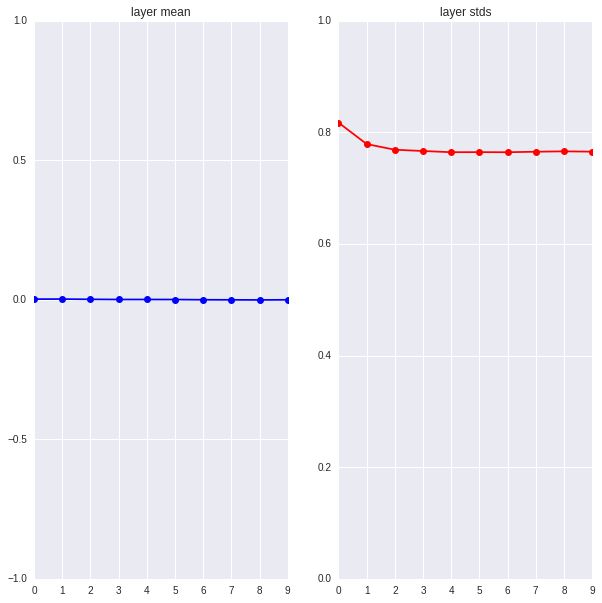

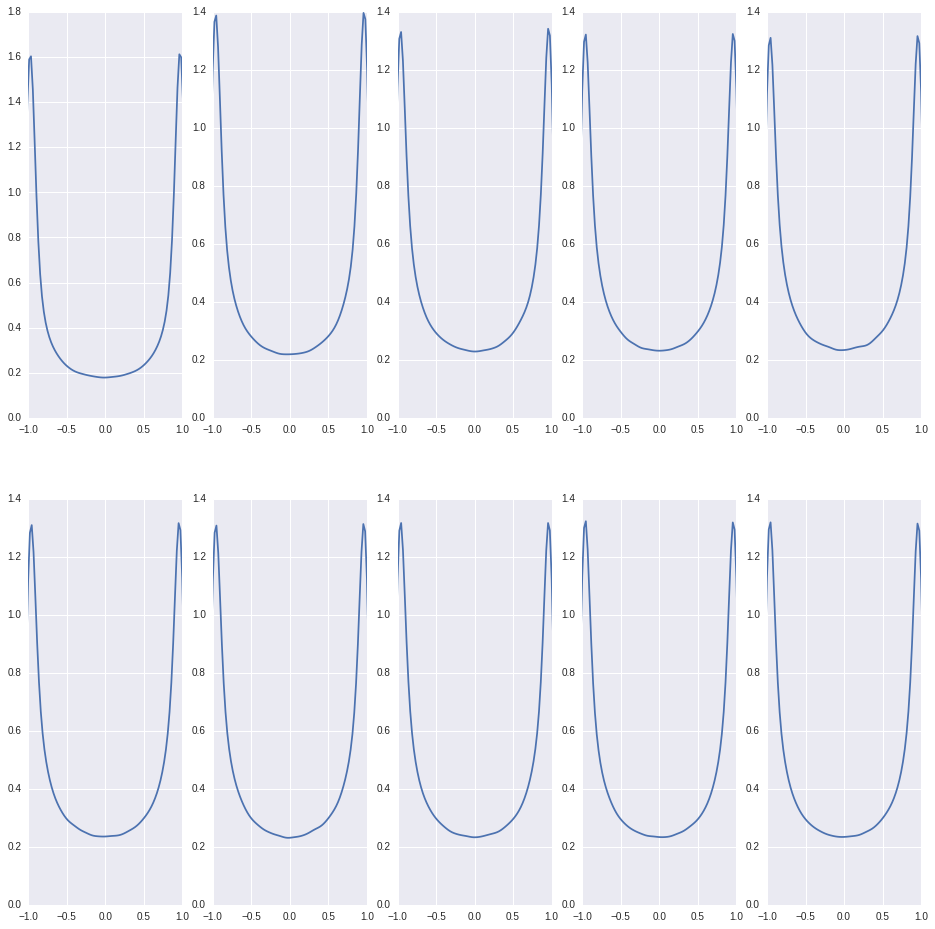

In [10]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.1
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean -0.30955 and std 15.9072
W_grad layer 8 had mean 0.0214229 and std 22.3178
W_grad layer 7 had mean -2.05984e-05 and std 32.2042
W_grad layer 6 had mean -0.0712402 and std 49.1196
W_grad layer 5 had mean 0.045111 and std 76.0955
W_grad layer 4 had mean 0.354479 and std 114.742
W_grad layer 3 had mean 0.0741485 and std 159.917
W_grad layer 2 had mean -1.60465 and std 234.381
W_grad layer 1 had mean 1.12329 and std 345.932
W_grad layer 0 had mean 0.507898 and std 569.345
dx layer 9 had mean 0.0342448 and std 1.44139
dx layer 8 had mean -0.121562 and std 2.03783
dx layer 7 had mean -0.156284 and std 3.08771
dx layer 6 had mean 0.0452047 and std 4.512
dx layer 5 had mean 0.439117 and std 6.81656
dx layer 4 had mean 0.0784163 and std 9.844
dx layer 3 had mean -0.67877 and std 14.4579
dx layer 2 had mean 0.95445 and std 21.0405
dx layer 1 had mean -0.935566 and std 29.5993
dx layer 0 had mean 0.618959 and std 40.3738


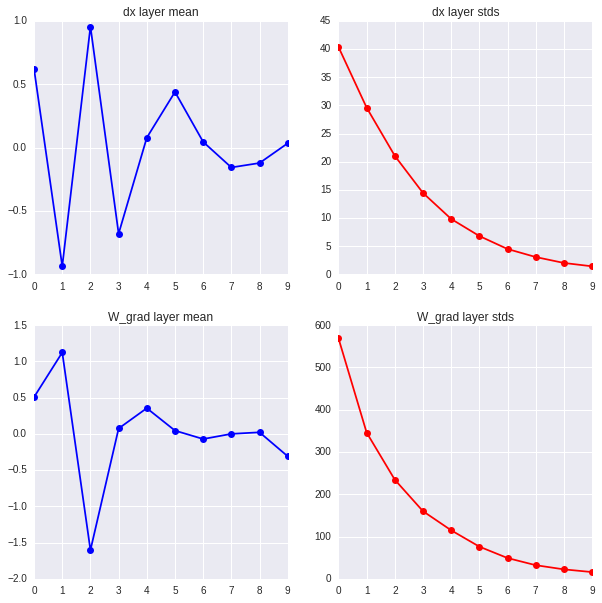

In [11]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -0.00056908 and std 9.1209
W_grad layer 8 had mean 0.0298362 and std 13.3302
W_grad layer 7 had mean -0.0332562 and std 19.3572
W_grad layer 6 had mean -0.0257869 and std 28.2055
W_grad layer 5 had mean -0.0233562 and std 41.254
W_grad layer 4 had mean -0.0766752 and std 60.6313
W_grad layer 3 had mean -0.145178 and std 88.4933
W_grad layer 2 had mean -0.261038 and std 131.425
W_grad layer 1 had mean -0.588925 and std 197.619
W_grad layer 0 had mean 0.535326 and std 331.584
dx layer 9 had mean 0.00143628 and std 0.841793
dx layer 8 had mean -0.00139689 and std 1.23061
dx layer 7 had mean 0.00860729 and std 1.79969
dx layer 6 had mean -0.000561625 and std 2.63816
dx layer 5 had mean -0.00166621 and std 3.863
dx layer 4 had mean -0.000782994 and std 5.6155
dx layer 3 had mean 0.00489078 and std 8.1782
dx layer 2 had mean 0.0217266 and std 11.9023
dx layer 1 had mean 0.0498207 and std 17.122
dx layer 0 had mean 0.0174423 and std 23.515


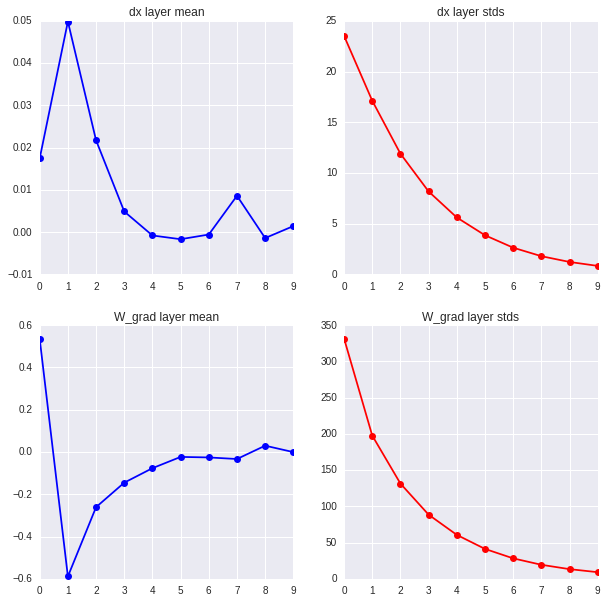

In [12]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1., high=1., size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Comments:
So, for this neural network, 1.0 and 0.01 are very unfavourable initialization parameters. Whereas 0.1 might actually have some slightly better properties (from this, it would require probably a learning rate of `1 / (600 * lambda)` for effective gradient descent to work, where $$\lambda\in[200,1000]$$ or where the change in the weights is small compared with the spread of the values). The worse case scenario for the activation being `tanh(x)` is that of the loss being all **1**.

# Xavier Initialization
It was shown that using a fixed form of initialization [Glorot et. al., 2010]. Yields better properties for backpropagation of gradients with `tanh(x)` non-linearities. The recommended gradient is given by, $$ 2.0 / \sqrt{\textrm{fan}_{\textrm{in}} + \textrm{fan}_{\textrm{out}}} $$ Lets try this out:

'sigma' for layer 0 = 0.0158114
'sigma' for layer 1 = 0.0158114
'sigma' for layer 2 = 0.0158114
'sigma' for layer 3 = 0.0158114
'sigma' for layer 4 = 0.0158114
'sigma' for layer 5 = 0.0158114
'sigma' for layer 6 = 0.0158114
'sigma' for layer 7 = 0.0158114
'sigma' for layer 8 = 0.0158114
'sigma' for layer 9 = 0.0158114
input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 8.02186e-05 and std 0.318593
Hidden layer 1 had mean 0.000196145 and std 0.110959
Hidden layer 2 had mean -7.97031e-05 and std 0.0390292
Hidden layer 3 had mean 1.75817e-05 and std 0.0138149
Hidden layer 4 had mean -1.33386e-05 and std 0.00490923
Hidden layer 5 had mean 3.49828e-06 and std 0.0017392
Hidden layer 6 had mean 1.06372e-06 and std 0.000614585
Hidden layer 7 had mean 3.75352e-07 and std 0.000216925
Hidden layer 8 had mean 1.06103e-07 and std 7.61886e-05
Hidden layer 9 had mean 5.00722e-08 and std 2.70531e-05


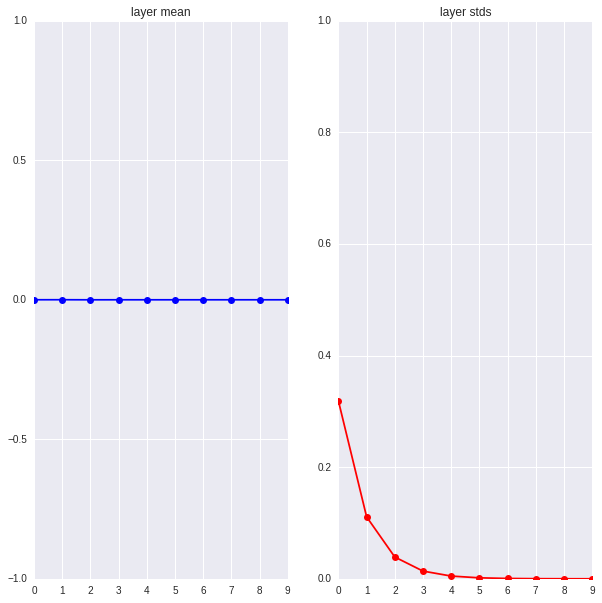

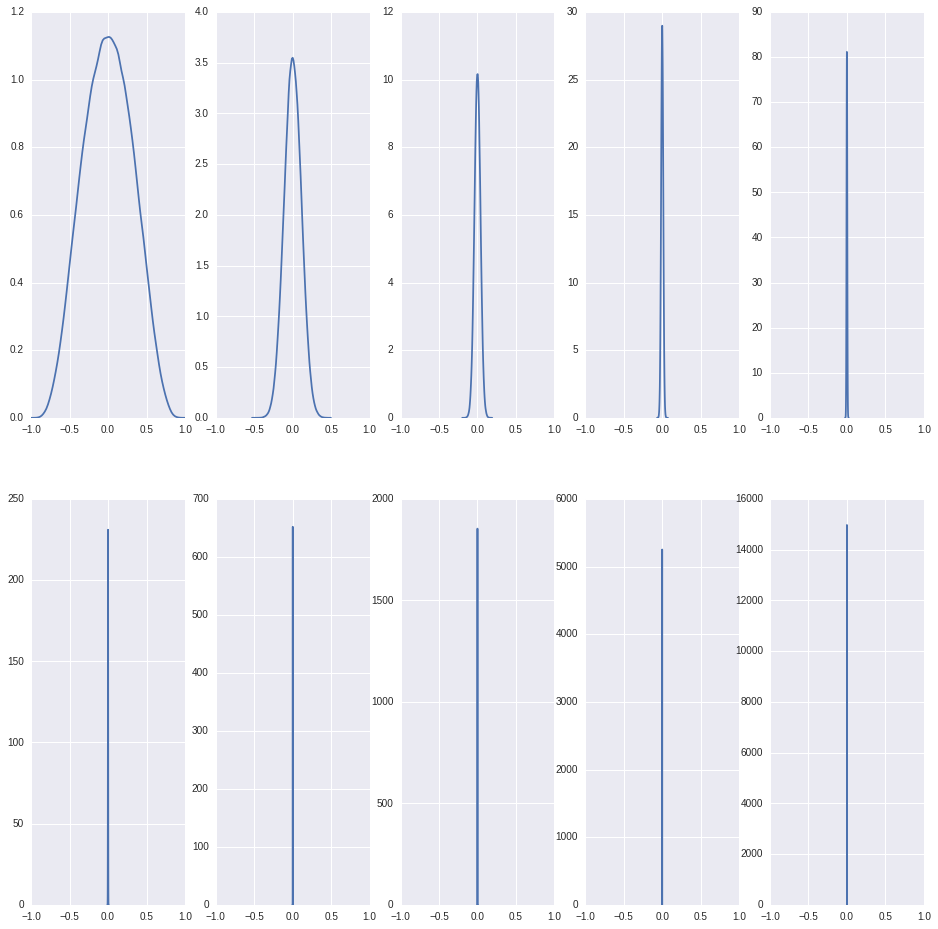

In [13]:
Hs  = {}
Ws  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / (np.sqrt(fan_in + fan_out) / 0.5)
    print("'sigma' for layer %d = %g" % (idx, 1. / (np.sqrt(fan_in + fan_out) / 0.5 )))
    #Xavier initialization (Glorot et. al., 2010)
    Ws[idx] = W
    
    H = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.0,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


W_grad layer 9 had mean 0.000106103 and std 0.00212843
W_grad layer 8 had mean 4.43551e-06 and std 0.00201721
W_grad layer 7 had mean 1.42322e-06 and std 0.00204659
W_grad layer 6 had mean 4.75663e-06 and std 0.00203499
W_grad layer 5 had mean -1.16827e-06 and std 0.00201341
W_grad layer 4 had mean -6.9015e-08 and std 0.00188756
W_grad layer 3 had mean 4.69423e-06 and std 0.00192582
W_grad layer 2 had mean -1.11883e-05 and std 0.00199019
W_grad layer 1 had mean -2.75813e-07 and std 0.00201843
W_grad layer 0 had mean 2.05725e-07 and std 0.00211024
dx layer 9 had mean 0.0118169 and std 0.327341
dx layer 8 had mean 0.00133796 and std 0.111834
dx layer 7 had mean 0.00135971 and std 0.0387105
dx layer 6 had mean 8.75871e-05 and std 0.0135239
dx layer 5 had mean -3.92041e-06 and std 0.0046939
dx layer 4 had mean -5.88907e-05 and std 0.00168593
dx layer 3 had mean -5.71675e-05 and std 0.000603606
dx layer 2 had mean -3.37455e-06 and std 0.0002063
dx layer 1 had mean -1.32886e-07 and std 7.391

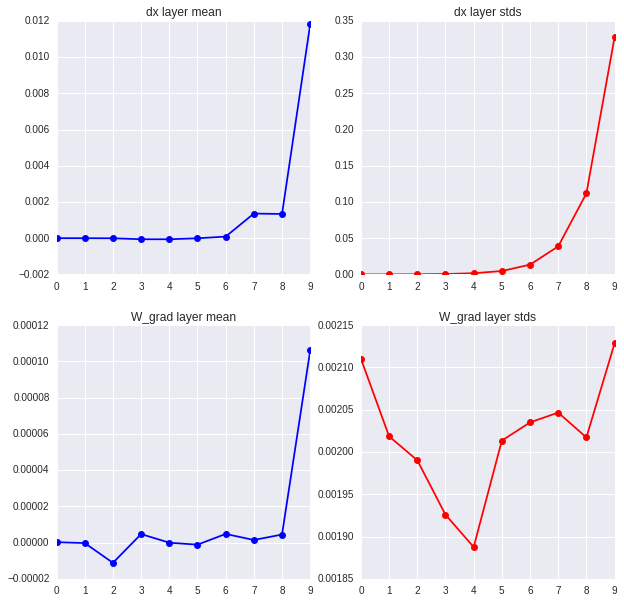

In [14]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -6.55871e-07 and std 0.0013823
W_grad layer 8 had mean 2.59838e-06 and std 0.00138896
W_grad layer 7 had mean -2.95547e-06 and std 0.00139938
W_grad layer 6 had mean -1.44626e-06 and std 0.00140922
W_grad layer 5 had mean -4.2404e-06 and std 0.00141354
W_grad layer 4 had mean 2.25168e-06 and std 0.00139887
W_grad layer 3 had mean -4.20067e-06 and std 0.00138553
W_grad layer 2 had mean 7.18309e-07 and std 0.00139557
W_grad layer 1 had mean -2.9013e-06 and std 0.00140707
W_grad layer 0 had mean -3.05439e-07 and std 0.0014271
dx layer 9 had mean -4.50065e-05 and std 0.204337
dx layer 8 had mean -7.81452e-05 and std 0.0723764
dx layer 7 had mean -7.7661e-05 and std 0.0256479
dx layer 6 had mean 5.48497e-06 and std 0.00904296
dx layer 5 had mean 3.97273e-06 and std 0.00319354
dx layer 4 had mean 1.29201e-06 and std 0.00112387
dx layer 3 had mean -5.06596e-07 and std 0.000399332
dx layer 2 had mean 5.63782e-07 and std 0.000141354
dx layer 1 had mean 1.07302e-07 and st

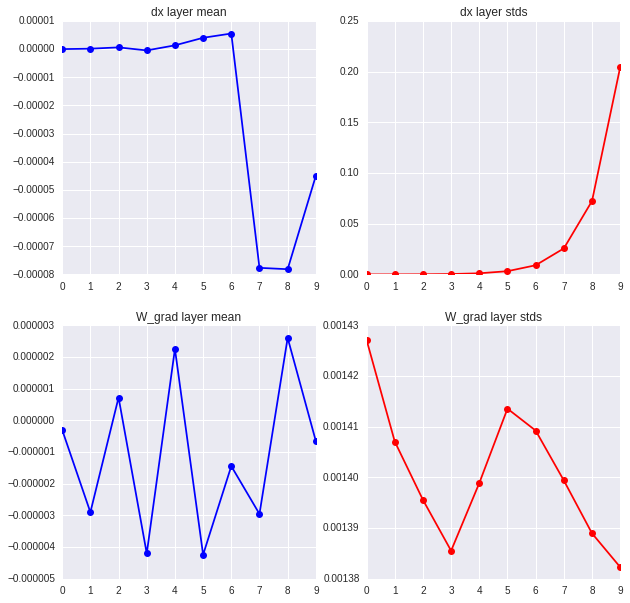

In [15]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

# Xavier Initialization Advantages
So, the size of the gradient decreases at the lower layers - allowing for a larger learning rate (**GOOD**). The shift in the weights is small compared to the initialization spread (**BETTER**). Interesting question: How large is the **goldilocks zone**?

In [16]:
# Dx = {}
# W_grad = {}
# dout = np.ones((1000,500))

# for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout

# layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
# layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

# layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
# layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

# for i,W in reversed(list(W_grad.items())):
#     print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

# for i,dx in reversed(list(Dx.items())):
#     print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

# plt.figure(figsize=(10,10))

# x_points = list(reversed(list(Dx.keys())))
# plt.subplot(221)
# plt.plot(x_points, layer_means_dx, 'ob-')
# plt.title('dx layer mean')

# plt.subplot(222)
# plt.plot(x_points, layer_stds_dx, 'or-')
# plt.title('dx layer stds')

# plt.subplot(223)
# plt.plot(x_points, layer_means_W_grad, 'ob-')
# plt.title('W_grad layer mean')

# plt.subplot(224)
# plt.plot(x_points, layer_stds_W_grad, 'or-')
# plt.title('W_grad layer stds')

# ReLU activation

What about a different activation function (suppose we try a rectified linear activation, `ReLU(x)`). Starting with the same initialization (0.01).

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.0888126 and std 0.130176
Hidden layer 1 had mean 0.0141046 and std 0.0206943
Hidden layer 2 had mean 0.0021337 and std 0.00317474
Hidden layer 3 had mean 0.000330712 and std 0.000487123
Hidden layer 4 had mean 5.45585e-05 and std 7.95447e-05
Hidden layer 5 had mean 8.16611e-06 and std 1.19637e-05
Hidden layer 6 had mean 1.25699e-06 and std 1.93647e-06
Hidden layer 7 had mean 2.09687e-07 and std 3.10927e-07
Hidden layer 8 had mean 3.25228e-08 and std 4.68163e-08
Hidden layer 9 had mean 4.93645e-09 and std 7.25355e-09


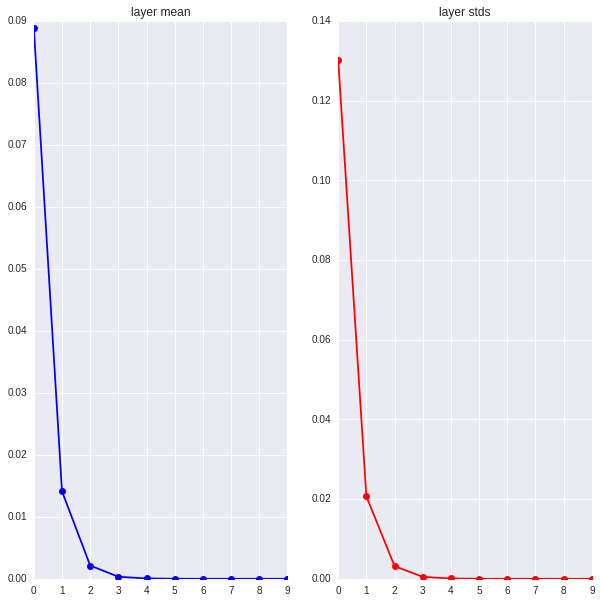

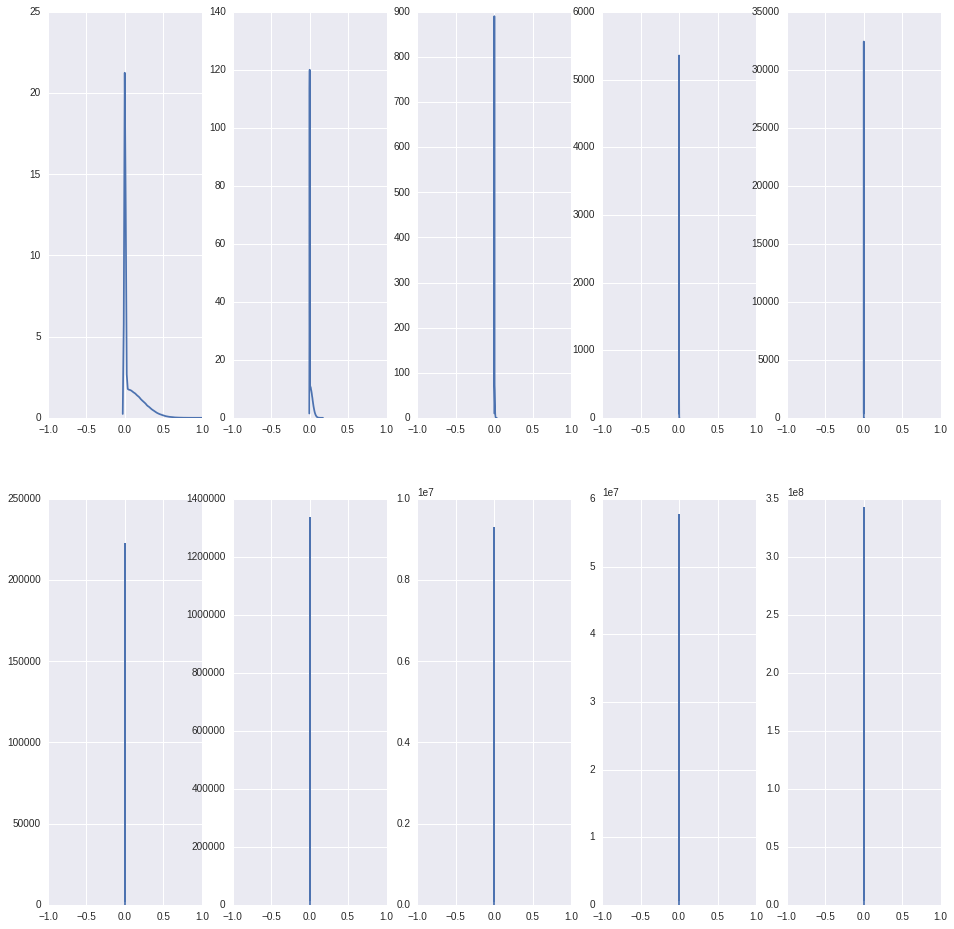

In [17]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.01
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])

## Problems?
See that the spread of values is very small for layers after layer 2. Let's investigate the gradient.

W_grad layer 9 had mean 1.60082e-05 and std 2.92242e-05
W_grad layer 8 had mean 1.08772e-05 and std 4.06182e-05
W_grad layer 7 had mean 9.4428e-06 and std 4.50264e-05
W_grad layer 6 had mean 1.02272e-05 and std 4.36747e-05
W_grad layer 5 had mean 1.12823e-05 and std 4.64101e-05
W_grad layer 4 had mean 1.02364e-05 and std 4.21414e-05
W_grad layer 3 had mean 9.90695e-06 and std 3.7863e-05
W_grad layer 2 had mean 9.80935e-06 and std 3.20873e-05
W_grad layer 1 had mean 8.75169e-06 and std 2.21625e-05
W_grad layer 0 had mean -2.23252e-08 and std 3.85754e-06
dx layer 9 had mean 0.492398 and std 0.499942
dx layer 8 had mean 0.0518793 and std 0.133489
dx layer 7 had mean 0.00751224 and std 0.0260189
dx layer 6 had mean 0.00125225 and std 0.00455919
dx layer 5 had mean 0.000206799 and std 0.000811134
dx layer 4 had mean 3.09346e-05 and std 0.000141031
dx layer 3 had mean 4.64374e-06 and std 2.36065e-05
dx layer 2 had mean 6.95531e-07 and std 3.91431e-06
dx layer 1 had mean 9.85808e-08 and std 6

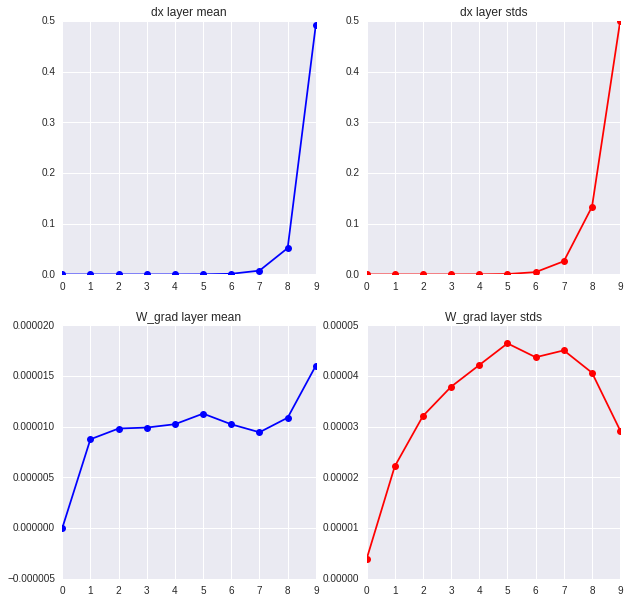

In [18]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

W_grad layer 9 had mean -5.58496e-09 and std 7.47394e-07
W_grad layer 8 had mean 4.18304e-09 and std 7.42841e-07
W_grad layer 7 had mean -3.51362e-09 and std 6.64539e-07
W_grad layer 6 had mean -1.14181e-08 and std 6.60878e-07
W_grad layer 5 had mean -9.88001e-09 and std 7.01987e-07
W_grad layer 4 had mean -1.00436e-08 and std 6.90402e-07
W_grad layer 3 had mean -2.73621e-10 and std 7.35426e-07
W_grad layer 2 had mean -3.99627e-10 and std 7.75765e-07
W_grad layer 1 had mean -1.00332e-09 and std 7.5394e-07
W_grad layer 0 had mean 6.85214e-10 and std 7.70987e-07
dx layer 9 had mean -0.000100006 and std 0.405124
dx layer 8 had mean 2.15689e-05 and std 0.0645768
dx layer 7 had mean -2.1086e-06 and std 0.0101761
dx layer 6 had mean -1.34021e-06 and std 0.00156765
dx layer 5 had mean -2.16108e-07 and std 0.00024878
dx layer 4 had mean -3.01056e-08 and std 3.9789e-05
dx layer 3 had mean 3.2281e-11 and std 6.25438e-06
dx layer 2 had mean 3.27841e-11 and std 9.78004e-07
dx layer 1 had mean -2.2

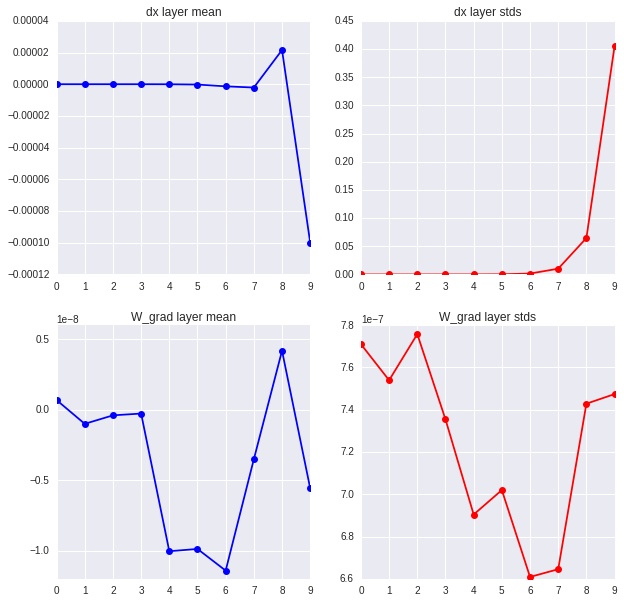

In [19]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## Results
The gradients for all layers are small compared to initialization spread (**GOOD**). Parameter might be too small. 

What about 0.1?

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.889511 and std 1.30465
Hidden layer 1 had mean 1.39723 and std 2.05362
Hidden layer 2 had mean 2.2039 and std 3.26503
Hidden layer 3 had mean 3.59439 and std 5.22232
Hidden layer 4 had mean 5.90504 and std 8.6548
Hidden layer 5 had mean 8.6732 and std 13.1022
Hidden layer 6 had mean 15.0453 and std 21.1302
Hidden layer 7 had mean 22.2821 and std 33.1638
Hidden layer 8 had mean 33.5776 and std 51.0992
Hidden layer 9 had mean 59.5199 and std 86.0058


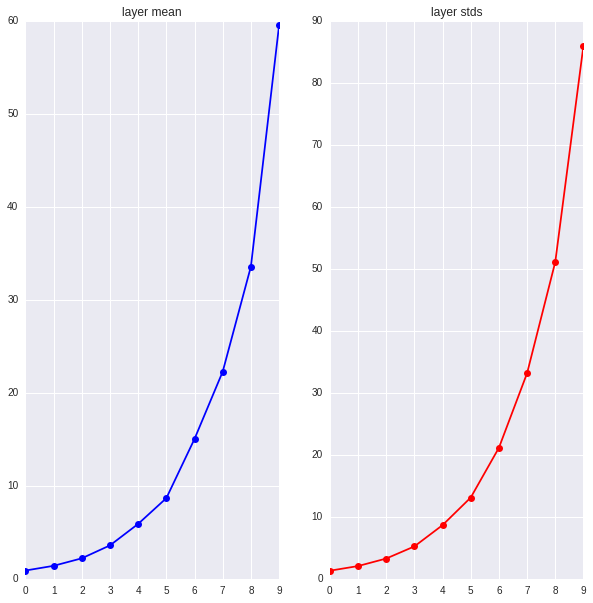

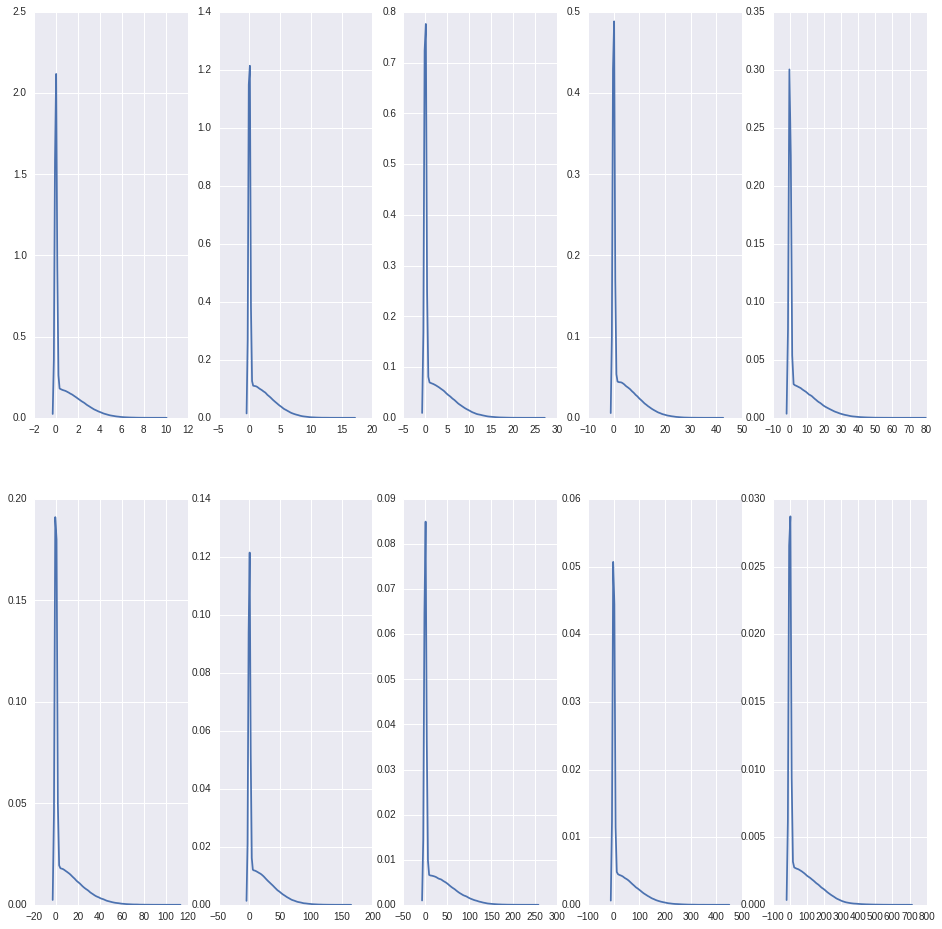

In [20]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 0.1
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean 2.70043 and std 813.901
W_grad layer 8 had mean -19.2263 and std 866.468
W_grad layer 7 had mean -29.021 and std 818.222
W_grad layer 6 had mean -6.66926 and std 811.728
W_grad layer 5 had mean 6.42817 and std 822.015
W_grad layer 4 had mean -29.7979 and std 772.528
W_grad layer 3 had mean -3.59276 and std 799.557
W_grad layer 2 had mean -11.7547 and std 805.179
W_grad layer 1 had mean -17.8454 and std 828.044
W_grad layer 0 had mean 1.34406 and std 821.888
dx layer 9 had mean 7.28143e-05 and std 0.413042
dx layer 8 had mean -0.000915956 and std 0.645369
dx layer 7 had mean -0.00187772 and std 1.00477
dx layer 6 had mean -0.000869796 and std 1.64993
dx layer 5 had mean 0.000804752 and std 2.58631
dx layer 4 had mean -0.00825361 and std 4.12517
dx layer 3 had mean -0.000947023 and std 6.55702
dx layer 2 had mean -0.00898718 and std 10.4264
dx layer 1 had mean -0.0183832 and std 16.4522
dx layer 0 had mean -0.0516205 and std 26.0078


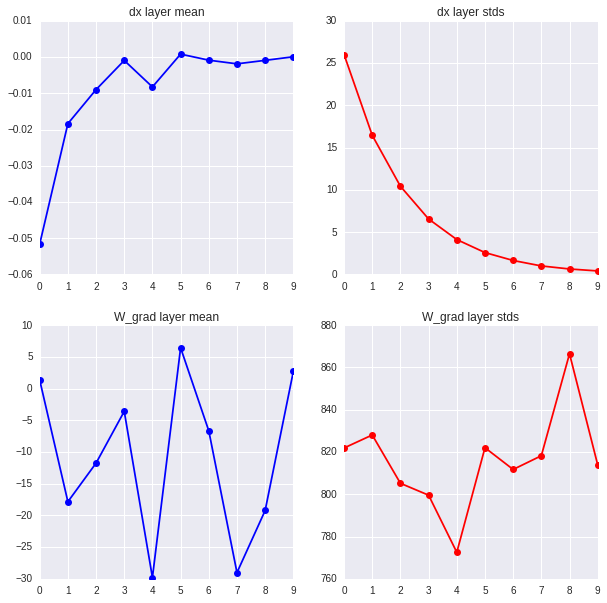

In [21]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 8.912 and std 13.0463
Hidden layer 1 had mean 149.475 and std 214.16
Hidden layer 2 had mean 2384.43 and std 3456.86
Hidden layer 3 had mean 38746.6 and std 56659.7
Hidden layer 4 had mean 619009 and std 892541
Hidden layer 5 had mean 9.94171e+06 and std 1.4413e+07
Hidden layer 6 had mean 1.68731e+08 and std 2.42095e+08
Hidden layer 7 had mean 2.44908e+09 and std 3.79121e+09
Hidden layer 8 had mean 3.73859e+10 and std 5.59872e+10
Hidden layer 9 had mean 6.11187e+11 and std 8.73442e+11


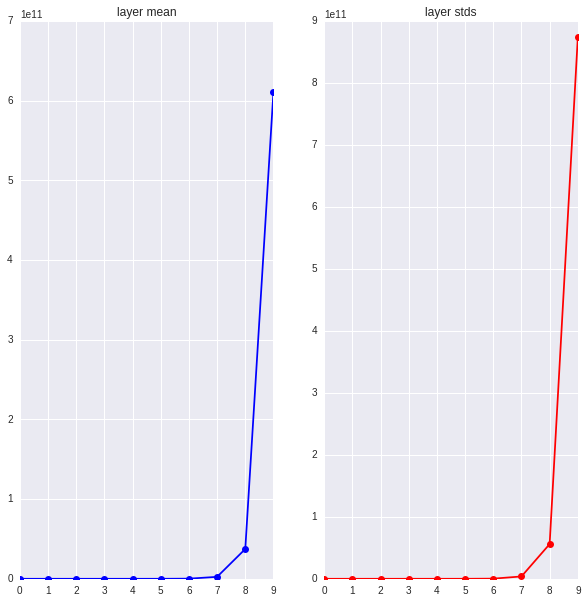

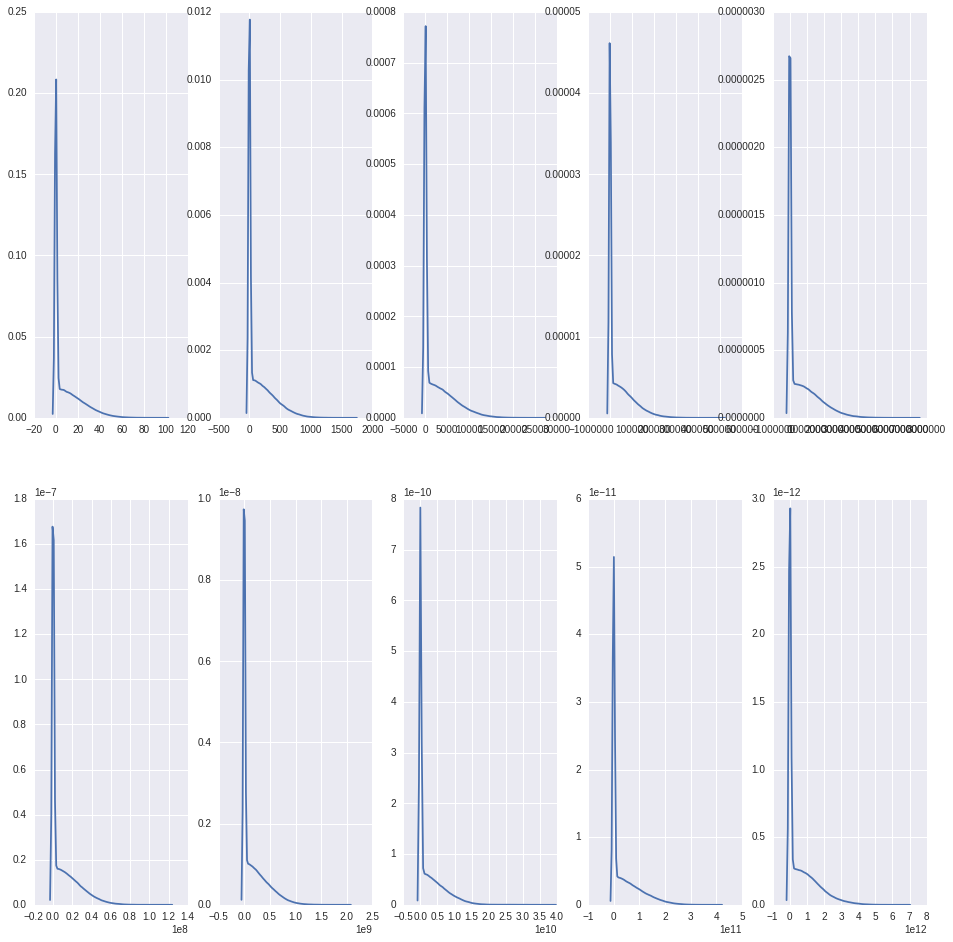

In [22]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) * 1.0
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
#ax1 = plt.subplot(121)
#ax1.set_ylim([-0.002,0.002])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean 4.60637e+10 and std 8.94051e+11
W_grad layer 8 had mean 6.19853e+10 and std 9.21089e+11
W_grad layer 7 had mean 3.76349e+10 and std 1.036e+12
W_grad layer 6 had mean 3.5291e+10 and std 1.02122e+12
W_grad layer 5 had mean 2.18316e+10 and std 9.65215e+11
W_grad layer 4 had mean 2.96109e+10 and std 9.40135e+11
W_grad layer 3 had mean 4.76416e+10 and std 9.00152e+11
W_grad layer 2 had mean 2.74353e+10 and std 8.84484e+11
W_grad layer 1 had mean 9.56362e+09 and std 8.4738e+11
W_grad layer 0 had mean -2.30526e+08 and std 8.33011e+11
dx layer 9 had mean 0.00121925 and std 0.414554
dx layer 8 had mean 0.024527 and std 6.45356
dx layer 7 had mean 0.234017 and std 100.226
dx layer 6 had mean 3.44422 and std 1617.08
dx layer 5 had mean 38.5344 and std 25587.8
dx layer 4 had mean 753.287 and std 404266
dx layer 3 had mean 20122.5 and std 6.51655e+06
dx layer 2 had mean 176036 and std 1.03757e+08
dx layer 1 had mean 950439 and std 1.66924e+09
dx layer 0 had mean 6.84228e+07 

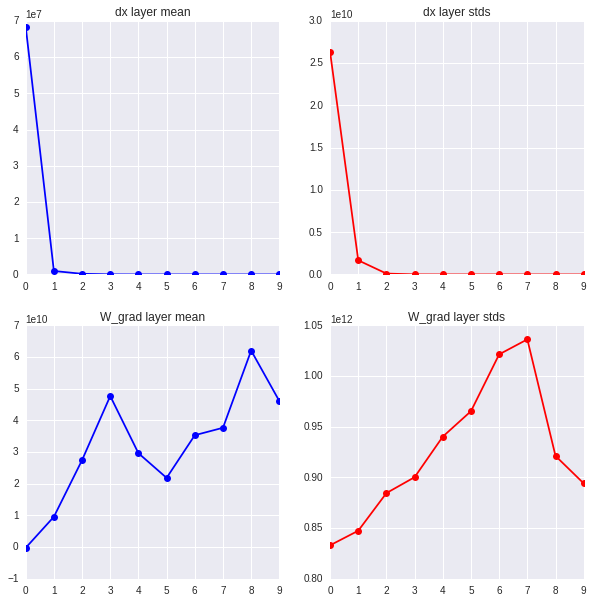

In [23]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact


layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

## 1.0 is bad (7E11)

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.565538 and std 0.826891
Hidden layer 1 had mean 0.564589 and std 0.831658
Hidden layer 2 had mean 0.552969 and std 0.826044
Hidden layer 3 had mean 0.558299 and std 0.808428
Hidden layer 4 had mean 0.540994 and std 0.806162
Hidden layer 5 had mean 0.595585 and std 0.857936
Hidden layer 6 had mean 0.571088 and std 0.854723
Hidden layer 7 had mean 0.595686 and std 0.840821
Hidden layer 8 had mean 0.634586 and std 0.924922
Hidden layer 9 had mean 0.650568 and std 0.906226


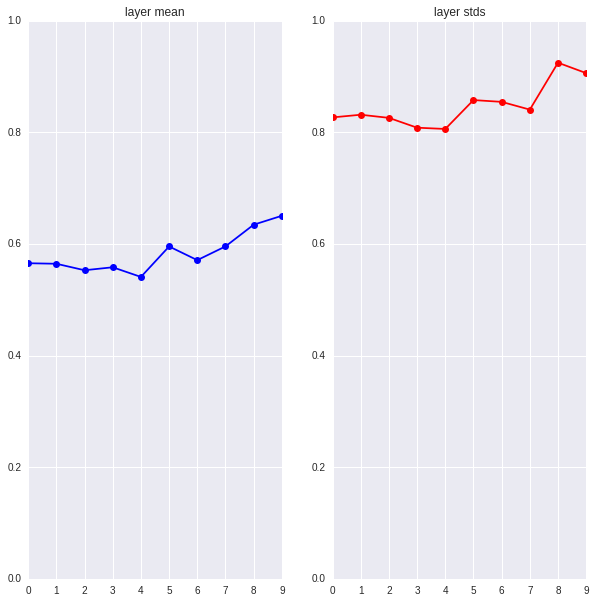

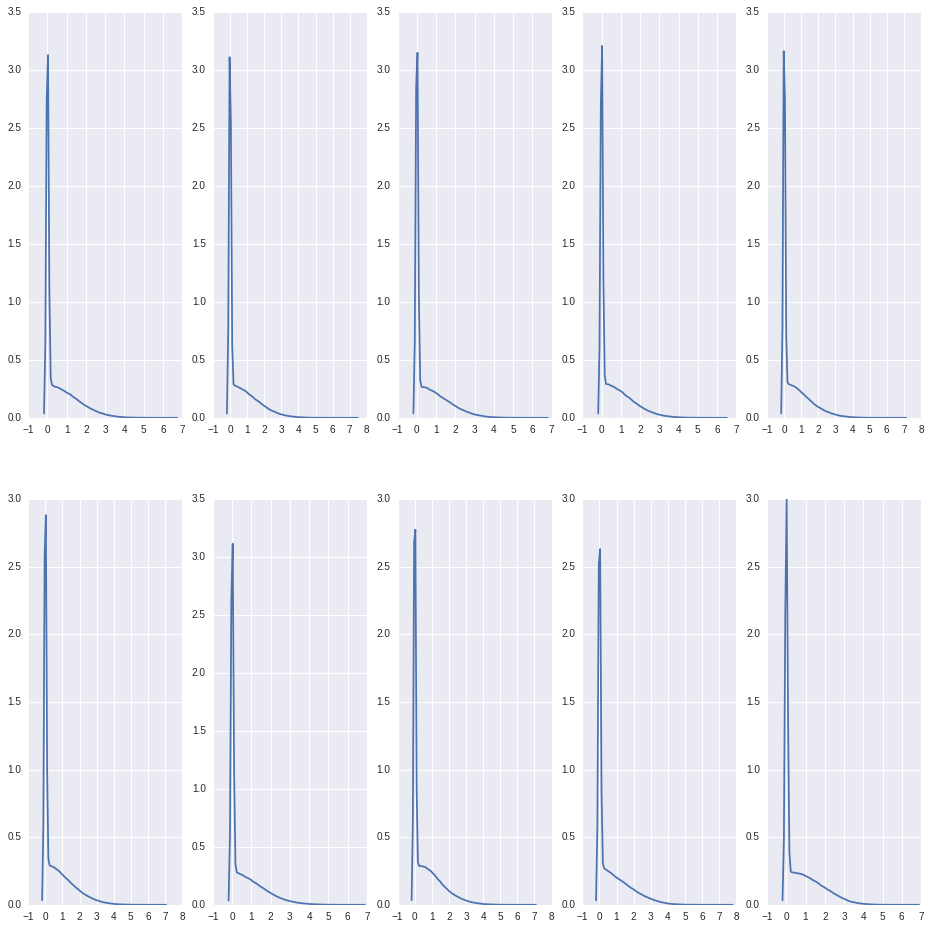

In [24]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / np.sqrt((fan_in + fan_out)/ 4.)
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([0.0,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.0,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)

W_grad layer 9 had mean -0.156586 and std 14.3772
W_grad layer 8 had mean 0.122079 and std 13.8094
W_grad layer 7 had mean -0.17293 and std 13.2872
W_grad layer 6 had mean -0.0260543 and std 13.474
W_grad layer 5 had mean 0.11913 and std 13.0139
W_grad layer 4 had mean 0.0368154 and std 13.2816
W_grad layer 3 had mean -0.139 and std 13.3618
W_grad layer 2 had mean 0.190786 and std 13.5792
W_grad layer 1 had mean 0.163147 and std 13.3238
W_grad layer 0 had mean -0.00999035 and std 13.5967
dx layer 9 had mean -0.000183821 and std 0.413903
dx layer 8 had mean 0.000285235 and std 0.415969
dx layer 7 had mean -0.000269724 and std 0.424004
dx layer 6 had mean -4.7944e-05 and std 0.422535
dx layer 5 had mean 0.000295271 and std 0.430588
dx layer 4 had mean 0.000124237 and std 0.431302
dx layer 3 had mean -0.000298049 and std 0.43556
dx layer 2 had mean 0.000393706 and std 0.428958
dx layer 1 had mean 0.000315902 and std 0.430076
dx layer 0 had mean -0.000198736 and std 0.430221


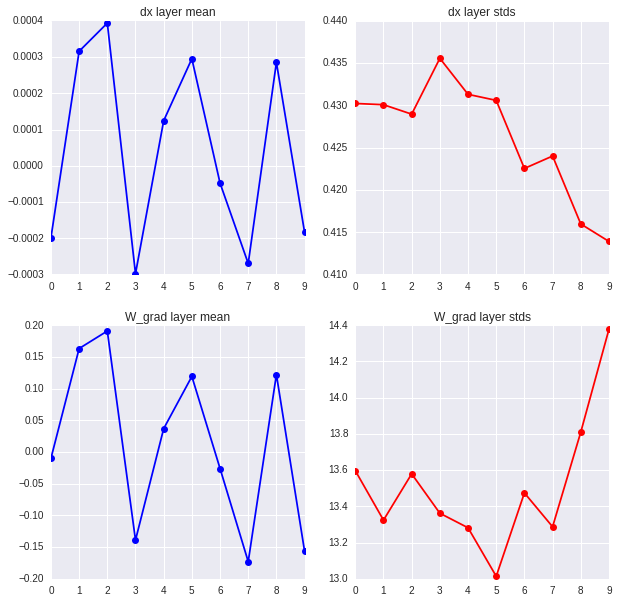

In [25]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

input layer had mean -0.00124517 and std 0.99998
Hidden layer 0 had mean 0.528742 and std 0.773834
Hidden layer 1 had mean 0.506596 and std 0.730879
Hidden layer 2 had mean 0.46317 and std 0.705376
Hidden layer 3 had mean 0.423608 and std 0.638055
Hidden layer 4 had mean 0.413594 and std 0.609547
Hidden layer 5 had mean 0.381935 and std 0.559537
Hidden layer 6 had mean 0.364962 and std 0.52574
Hidden layer 7 had mean 0.298095 and std 0.464368
Hidden layer 8 had mean 0.284088 and std 0.407593
Hidden layer 9 had mean 0.280035 and std 0.40049


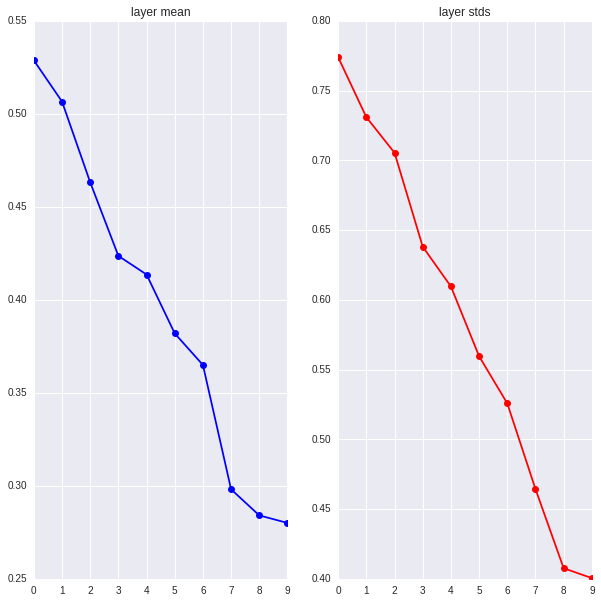

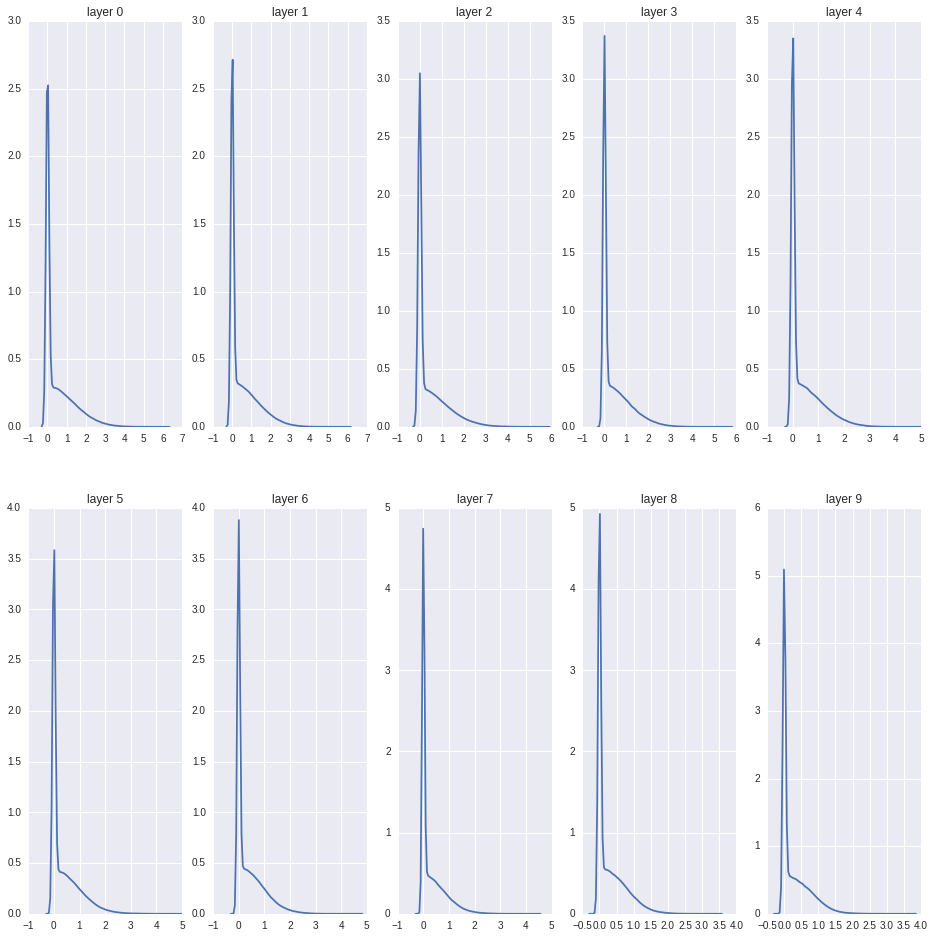

In [26]:
Hs  = {}
Ws  = {}
Zs  = {}

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    W = np.random.randn(fan_in, fan_out) / np.sqrt((fan_in + fan_out)/ 3.5)
    Ws[idx] = W
    
    H = np.dot(X, W)
    Zs[idx] = H.copy()
    H = act['relu'](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel(),bw=.1)
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    plt.title("layer %d"% i)

W_grad layer 9 had mean -0.201868 and std 6.38946
W_grad layer 8 had mean -0.0487294 and std 6.90906
W_grad layer 7 had mean -0.170955 and std 7.28506
W_grad layer 6 had mean -0.0496863 and std 6.95109
W_grad layer 5 had mean -0.245808 and std 7.20324
W_grad layer 4 had mean -0.122826 and std 6.80003
W_grad layer 3 had mean -0.192997 and std 7.01267
W_grad layer 2 had mean 0.0274667 and std 6.81688
W_grad layer 1 had mean -0.0924157 and std 6.88409
W_grad layer 0 had mean 0.0135666 and std 6.88932
dx layer 9 had mean -0.000572565 and std 0.411798
dx layer 8 had mean -5.44469e-05 and std 0.386676
dx layer 7 had mean -0.000439235 and std 0.348946
dx layer 6 had mean -1.8748e-05 and std 0.329457
dx layer 5 had mean -0.000568425 and std 0.308228
dx layer 4 had mean -0.000242209 and std 0.287298
dx layer 3 had mean -0.000402568 and std 0.267286
dx layer 2 had mean 2.98809e-05 and std 0.246344
dx layer 1 had mean -0.000188612 and std 0.232578
dx layer 0 had mean -0.000167737 and std 0.217681

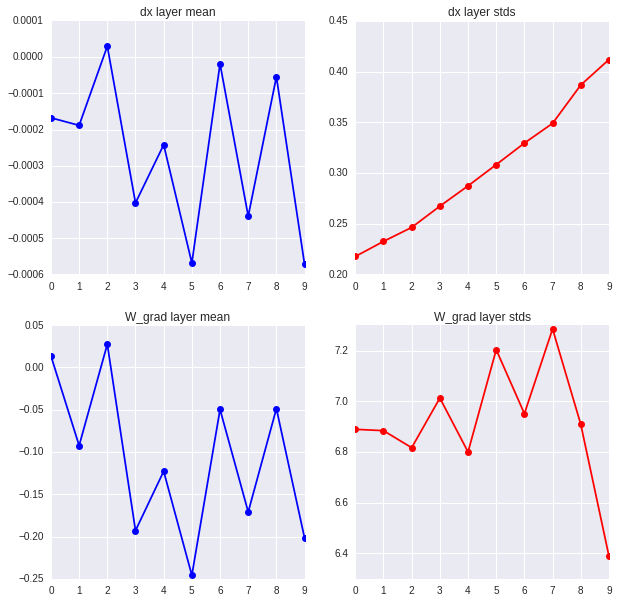

In [27]:
Dx = {}
W_grad = {}
dout = np.random.uniform(low=-1.0, high=1.0, size=(1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
    X = D if i == 0 else Hs[i-1]
    dact = np.array(dout, copy=True)
    dact[Zs[i] < 0] = 0
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dact

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')

50.0250750034
input layer had mean -0.0846653 and std 50.0251
Hidden layer 0 had mean 0.000421655 and std 0.72076
Hidden layer 1 had mean -0.000764164 and std 0.633984
Hidden layer 2 had mean -0.00121729 and std 0.596444
Hidden layer 3 had mean 0.00173798 and std 0.576658
Hidden layer 4 had mean 0.000185856 and std 0.566533
Hidden layer 5 had mean 0.000587293 and std 0.561574
Hidden layer 6 had mean -0.00089405 and std 0.557501
Hidden layer 7 had mean 0.00102866 and std 0.556114
Hidden layer 8 had mean -0.000299494 and std 0.553766
Hidden layer 9 had mean 0.000400127 and std 0.55402


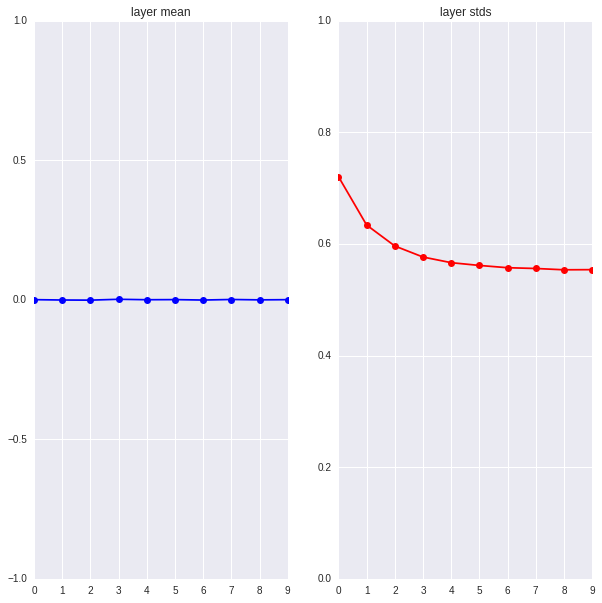

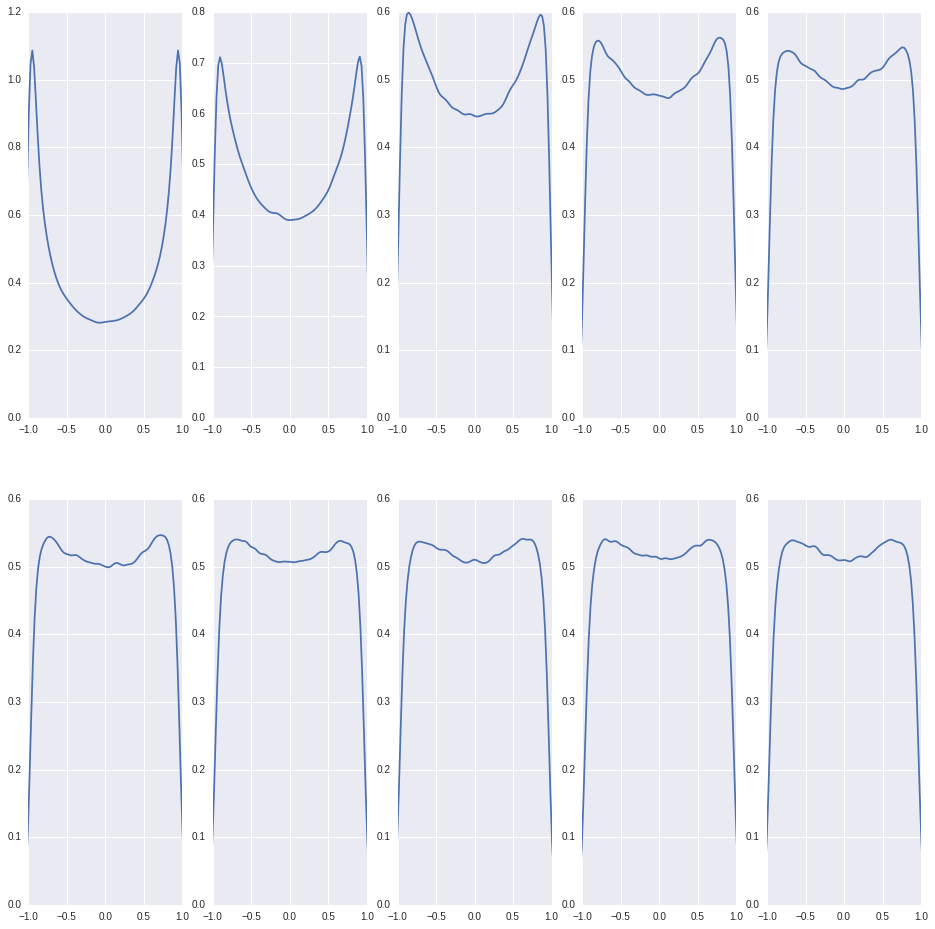

In [28]:
PreHs = {}
Hs  = {}
Ws  = {}

#Trying this with a non-unit Gaussian input;
D = np.random.randn(1000,500) * 50
print(np.std(D))

for idx, x in enumerate(hidden_layer_sizes):
    X = D if idx == 0 else Hs[idx-1]
    # input at this layer comes from the prior layer
    fan_in  = X.shape[1]
    fan_out = hidden_layer_sizes[idx] 
    if idx == 0:
        W = np.random.randn(fan_in, fan_out) * np.sqrt(4.) / 50.  / np.sqrt(fan_in + fan_out)
        #this will normalize the input;
    else:
        W = np.random.randn(fan_in, fan_out) * np.sqrt(4.) / np.sqrt(fan_in + fan_out)
        # the output of the first layer is now normalized
    Ws[idx] = W
    #default initialization
    
    H = np.dot(X, W)
    PreHs[idx] = np.dot(X, W)
    H = act[non_linearities[idx]](H)
    #affine transformation and then use the activation function
    #there is no bias :D
    Hs[idx] = H

print("input layer had mean %g and std %g" % (np.mean(D), np.std(D)))
layer_means = [ np.mean(H) for i,H in Hs.items() ]
layer_stds  = [ np.std(H) for i,H in Hs.items() ]

for i,H in Hs.items():
    print("Hidden layer %d had mean %g and std %g" % (i, np.mean(H), np.std(H)))

#plot the means and standard deviations
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
ax1 = plt.subplot(121)
ax1.set_ylim([-1.,1.0])
plt.title('layer mean')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
ax1 = plt.subplot(122)
ax1.set_ylim([0.,1.0])
plt.title('layer stds')

plt.figure(figsize=(16,16))
for i,H in Hs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.kdeplot(data=H.ravel())
    ax = plt.subplot( 2, len(Hs) // 2, i+1)
    ax.set_xlim([-1.0,1.0])


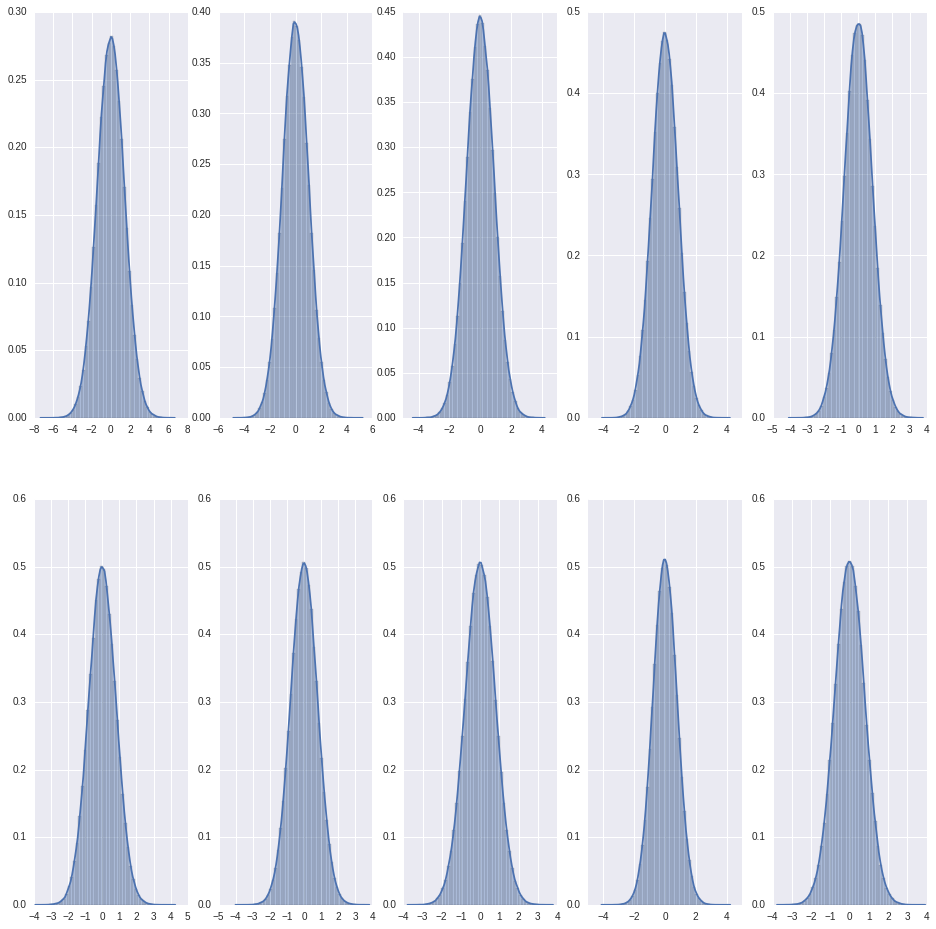

In [29]:
plt.figure(figsize=(16,16))
for i,H in PreHs.items():
    plt.subplot( 2, len(Hs) // 2, i+1)
    sns.distplot(a=H.ravel())
    ax = plt.subplot(2, len(Hs) // 2, i+1)

W_grad layer 9 had mean -0.234254 and std 15.0211
W_grad layer 8 had mean 0.0972912 and std 16.7518
W_grad layer 7 had mean -0.0487478 and std 20.4343
W_grad layer 6 had mean 0.0854371 and std 22.6028
W_grad layer 5 had mean -0.0240991 and std 25.772
W_grad layer 4 had mean 0.14999 and std 30.1112
W_grad layer 3 had mean -0.138666 and std 34.5687
W_grad layer 2 had mean -0.135819 and std 39.7684
W_grad layer 1 had mean -0.0323756 and std 47.0517
W_grad layer 0 had mean -1.41372 and std 3189.44
dx layer 9 had mean 0.107846 and std 1.12531
dx layer 8 had mean 0.0787182 and std 1.31521
dx layer 7 had mean 0.190667 and std 1.54488
dx layer 6 had mean -0.0858776 and std 1.73203
dx layer 5 had mean 0.111215 and std 1.98672
dx layer 4 had mean 0.0856463 and std 2.29185
dx layer 3 had mean 0.182247 and std 2.55104
dx layer 2 had mean -0.00334346 and std 2.70654
dx layer 1 had mean -0.0463956 and std 2.95403
dx layer 0 had mean -0.00059666 and std 0.0567829


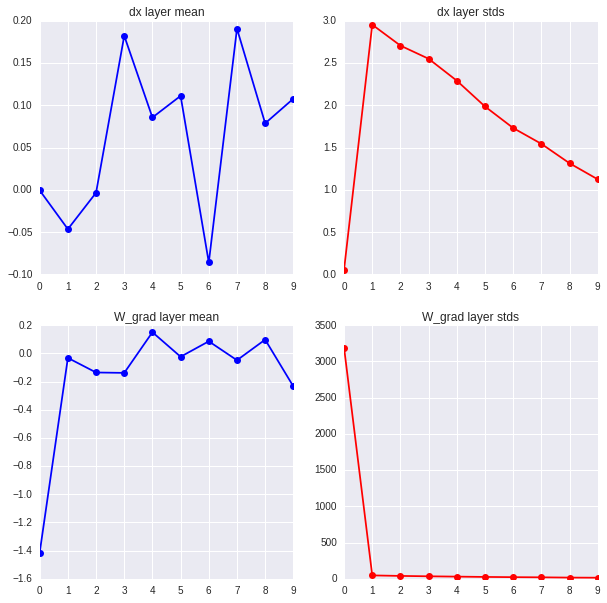

In [30]:
Dx = {}
W_grad = {}
dout = np.ones((1000,500))

for i, H in reversed(list(Hs.items())):
#     W_grad[i] = np.dot(Hs[i].T, dout)
#     dout = np.dot(dout, Ws[i].T)
#     Dx[i] = dout
# ABOVE is without activation modification
    X = D if i == 0 else Hs[i-1]
    dact = (1 - np.square(np.tanh(Hs[i]))) * dout
    W_grad[i] = np.dot(dact.T, X) 
    dout = np.dot(dact, Ws[i].T)
    Dx[i] = dout

layer_means_dx = [ np.mean(H) for i,H in reversed(list(Dx.items())) ]
layer_stds_dx  = [ np.std(H) for i,H in reversed(list(Dx.items())) ]

layer_means_W_grad = [ np.mean(H) for i,H in reversed(list(W_grad.items())) ]
layer_stds_W_grad  = [ np.std(H) for i,H in reversed(list(W_grad.items())) ]

for i,W in reversed(list(W_grad.items())):
    print("W_grad layer %d had mean %g and std %g" % (i, np.mean(W), np.std(W)))

for i,dx in reversed(list(Dx.items())):
    print("dx layer %d had mean %g and std %g" % (i, np.mean(dx), np.std(dx)))

plt.figure(figsize=(10,10))

x_points = list(reversed(list(Dx.keys())))
plt.subplot(221)
plt.plot(x_points, layer_means_dx, 'ob-')
plt.title('dx layer mean')

plt.subplot(222)
plt.plot(x_points, layer_stds_dx, 'or-')
plt.title('dx layer stds')

plt.subplot(223)
plt.plot(x_points, layer_means_W_grad, 'ob-')
plt.title('W_grad layer mean')

plt.subplot(224)
plt.plot(x_points, layer_stds_W_grad, 'or-')
plt.title('W_grad layer stds')